### Loading Python Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from gensim.models import FastText
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading Models, Label Encoder and FastText Model

In [2]:
log_clf = joblib.load('../Models/log_model.joblib')
xgb_clf = joblib.load('../Models/xgb_model.joblib')
lgbm_clf = joblib.load('../Models/lgbm_model.joblib')
le = joblib.load('../Models/label_encoder.joblib')
ft_model = FastText.load('../Models/fasttext_model.bin')

### Loading Test Data

In [3]:
X_test_ft = np.load('../Test Datasets/X_test_ft.npy')
y_test = np.load('../Test Datasets/y_test.npy',allow_pickle=True)
y_test = pd.Series(y_test)

### Generating Model Predicitions

In [4]:
log_pred = log_clf.predict(X_test_ft)
xgb_pred_enc = xgb_clf.predict(X_test_ft)
xgb_pred = le.inverse_transform(xgb_pred_enc)
lgbm_pred = lgbm_clf.predict(X_test_ft)

### Preparing Labels, Colormap and Model Dicitionary

In [5]:
labels = le.classes_
cmaps = {
    'Logistic Regression': 'Reds',
    'XGBoost': 'Blues',
    'LightGBM': 'Greens'
}

models = {
    'Logistic Regression': log_pred,
    'XGBoost': xgb_pred,
    'LightGBM': lgbm_pred
}

### Computing and Displaying Metrics and Showing Confusion Matrices

Logistic Regression:
Accuracy Score: 0.5272718523686933
Precision Score (macro): 0.5260726870010074
Recall Score (macro): 0.5235886556819493
F1 Score (macro): 0.5191489012356144



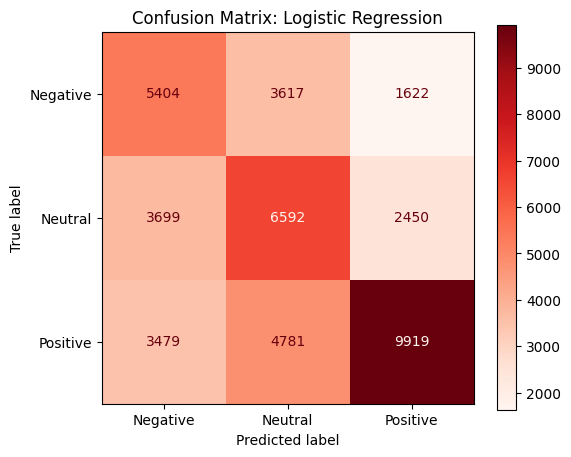

XGBoost:
Accuracy Score: 0.6188918028053798
Precision Score (macro): 0.6037320248791248
Recall Score (macro): 0.6005643866464627
F1 Score (macro): 0.601941638906769



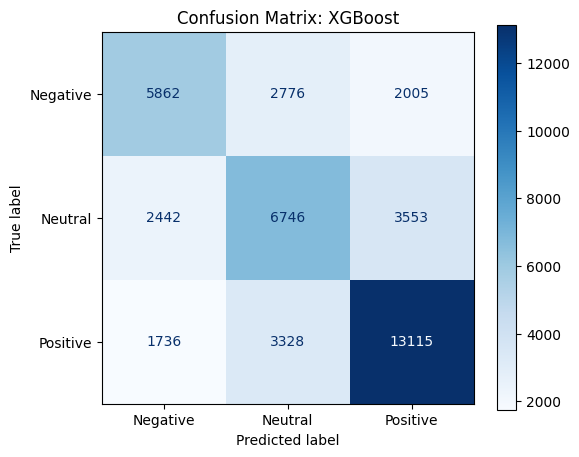

LightGBM:
Accuracy Score: 0.5572985588143301
Precision Score (macro): 0.5590611155691229
Recall Score (macro): 0.5569677846163671
F1 Score (macro): 0.5508387803411999



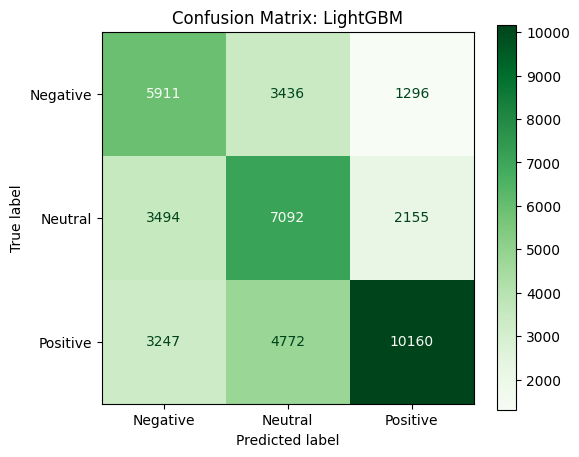

In [6]:
metric_dict = {}
for name, preds in models.items():
    print(f"{name}:")
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='macro')
    rec = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')
    print(f"Accuracy Score: {acc}")
    print(f"Precision Score (macro): {prec}")
    print(f"Recall Score (macro): {rec}")
    print(f"F1 Score (macro): {f1}")
    print()

    metric_dict[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    }

    cm = confusion_matrix(y_test, preds, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(cmap=cmaps[name], ax=ax, values_format='d')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

### Assembling and Displaying Final Metrics Table

In [7]:
metrics_df = pd.DataFrame(metric_dict).T
print("Performance Metrics Table:")
metrics_df

Performance Metrics Table:


,Accuracy,Precision,Recall,F1
Logistic Regression,0.527272,0.526073,0.523589,0.519149
XGBoost,0.618892,0.603732,0.600564,0.601942
LightGBM,0.557299,0.559061,0.556968,0.550839
